In [1]:
import os, sys, re
import pandas as pd
import numpy as np
from numpy import argmax
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from com.ibm.watson.utils import pubmed_utils as pu

In [2]:
base_dir = os.path.join("/Users/singhv/Documents/Data/DL")

In [3]:
stop_words = sum([ line.strip().split(", ") for line in open(os.path.join(base_dir, "pubmed_stopwords.txt")) ], [])
print stop_words

['a', 'about', 'again', 'all', 'almost', 'also', 'although', 'always', 'among', 'an', 'and', 'another', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'between', 'both', 'but', 'by', 'can', 'could', 'did', 'do', 'does', 'done', 'due', 'during', 'each', 'either', 'enough', 'especially', 'etc', 'for', 'found', 'from', 'further', 'had', 'has', 'have', 'having', 'here', 'how', 'however', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'itself', 'just', 'kg', 'km', 'made', 'mainly', 'make', 'may', 'mg', 'might', 'ml', 'mm', 'most', 'mostly', 'must', 'nearly', 'neither', 'no', 'nor', 'obtained', 'of', 'often', 'on', 'our', 'overall', 'perhaps', 'pmid', 'quite', 'rather', 'really', 'regarding', 'seem', 'seen', 'several', 'should', 'show', 'showed', 'shown', 'shows', 'significantly', 'since', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'theirs', 'them', 'then', 'there', 'therefore', 'these', 'they', 'this', 'those', 'through', 'thus', 'to', 'upon', 'use', 'used', '

In [4]:
n_features = 1000
n_topics = 50
n_top_words = 20

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [5]:
file_name = os.path.join(base_dir, "pubmed_breast_cancer_corpus.tsv.gz")
df = pd.read_csv(file_name, sep = "\t", compression = "gzip", dtype='str', encoding="utf-8", index_col = 0)

In [7]:
abstracts = []
for (pmid, series) in df.iterrows():
    abstract = unicode(series[0])
    if (abstract is not None) and (abstract.strip() != ""):
        abstracts.append(abstract)

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=50,
                                   max_features=n_features,
                                   stop_words=stop_words, token_pattern=r"(?u)\b[a-zA-Z]\w+\b")

In [22]:
tfidf = tfidf_vectorizer.fit_transform(abstracts)

In [8]:
'''
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=50,
                                max_features=n_features,
                                stop_words=stop_words, token_pattern=r"(?u)\b[a-zA-Z]\w+\b")
'''
tf_vectorizer = joblib.load(os.path.join(base_dir, "pickle", "sklearn_pubmed_breast_cancer_vectorizer.pkl"))

In [11]:
tf = tf_vectorizer.fit_transform(abstracts)

In [9]:
'''
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=100,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
'''
lda = joblib.load(os.path.join(base_dir, "pickle", "sklearn_pubmed_breast_cancer.pkl"))
print lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_jobs=1, n_topics=50, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)


In [13]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_jobs=1, n_topics=50, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [10]:
tf_feature_names = tf_vectorizer.get_feature_names()

In [8]:
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
er receptor estrogen breast positive pr negative luminal subtypes erα hormone progesterone subtype endocrine basal status tumors cancers molecular receptors
Topic #1:
blood rt samples pcr assay il time real quantitative mrna reaction chain detection rna detected western assays analysis flow detect
Topic #2:
chemotherapy adjuvant therapy nan mbc arm received receiving systemic randomized based treated receive hormone standard patients benefit function given treatments
Topic #3:
data model based analysis models clinical classification set network cancer approach features validation prediction identify biomarkers different developed disease biological
Topic #4:
cancer breast women years age diagnosis mortality incidence population stage year diagnosed data rates study aged early older time younger
Topic #5:
cancer life breast women pain survivors physical symptoms intervention quality study after baseline scores fatigue related scale treatment self reported
Topic #6:
tumors tumo

In [ ]:
print tf_feature_names

In [50]:
article = pu.get_medline("24372583")

In [51]:
pubmed_abstract = list(article)[0]["AB"]

In [52]:
print pubmed_abstract

The contribution of BRCA1/BRCA2 mutations to hereditary breast cancer in the Tunisian population has not been accurately estimated. The purpose of our study was to estimate the incidence and spectrum of pathogenic mutations in BRCA1/2 genes in early onset and familial breast/ovarian cancer among Tunisian women. To identify predictive factors for BRCA1/2 mutations, we screened the entire coding sequences and intron/exon boundaries of BRCA1/BRCA2 genes in 48 patients by direct sequencing. Twelve pathogenic mutations were detected (25%); three in BRCA1 (c.211dupA in four families, c.5266dupC in three families and c.1504_1508delTTAAA in one family) and two novel mutations in BRCA2 (c.1313dupT in two families and c.7654dupT in two families). We also identified 23 different polymorphisms and unclassified variants. These results indicate that our population has a spectrum of recurrent BRCA mutations.


In [53]:
doc_topic_distr = lda.transform(tf_vectorizer.transform([pubmed_abstract]))

In [54]:
print doc_topic_distr
print argmax(doc_topic_distr[0])

[[  2.00000000e-02   2.00000000e-02   2.00000000e-02   1.81762480e+00
    7.52537230e+00   2.00000000e-02   2.00000000e-02   2.00000000e-02
    2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
    2.00000000e-02   2.00000000e-02   2.00000000e-02   2.26863885e+00
    6.08071207e+00   2.00000000e-02   2.00000000e-02   2.00000000e-02
    2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
    2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
    2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
    2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
    2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
    2.00000000e-02   2.00000000e-02   2.00000000e-02   3.64076520e+01
    2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
    2.00000000e-02   2.00000000e-02]]
43


In [36]:
topic_dist = doc_topic_distr[0]
print tf_feature_names[argmax(topic_dist)]

aged


In [84]:
#joblib.dump(lda, os.path.join(base_dir, "pickle", "sklearn_pubmed_breast_cancer.pkl")) 

['/Users/singhv/Documents/Data/DL/sklearn_pubmed_breast_cancer.pkl',
 '/Users/singhv/Documents/Data/DL/sklearn_pubmed_breast_cancer.pkl_01.npy',
 '/Users/singhv/Documents/Data/DL/sklearn_pubmed_breast_cancer.pkl_02.npy',
 '/Users/singhv/Documents/Data/DL/sklearn_pubmed_breast_cancer.pkl_03.npy']

In [85]:
#joblib.dump(tf_vectorizer, os.path.join(base_dir, "pickle", "sklearn_pubmed_breast_cancer_vectorizer.pkl"))

['/Users/singhv/Documents/Data/DL/sklearn_pubmed_breast_cancer_vectorizer.pkl']

In [11]:
topic_dist = lda.transform(tf_vectorizer.transform(abstracts))

In [12]:
print topic_dist[0]

[  1.45938744e+01   2.00000000e-02   2.00000000e-02   1.15421196e+01
   2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
   2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
   2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
   1.77517299e+01   2.00000000e-02   2.00000000e-02   2.00000000e-02
   2.16081588e+01   4.51096248e+00   2.00000000e-02   2.00000000e-02
   2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
   7.36407339e+00   2.00000000e-02   2.00000000e-02   2.00000000e-02
   2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
   2.00000000e-02   2.00000000e-02   2.00000000e-02   1.80205068e+01
   2.00000000e-02   2.00000000e-02   2.00000000e-02   2.00000000e-02
   2.00000000e-02   2.00000000e-02   2.00000000e-02   2.76857464e+00
   2.00000000e-02   2.00000000e-02]


In [14]:
pca = PCA(n_components=2)
Y = pca.fit_transform(topic_dist)

In [18]:
print len(Y)
print len(abstracts)
print len(topic_dist)

80119
80119
80119


In [19]:
from sklearn.cluster import KMeans

In [42]:
kmeans = KMeans(n_clusters=15)
#predictions = kmeans.fit_predict(topic_dist)
kmeans.fit(topic_dist)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=15, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [21]:
print kmeans.labels
print len(predictions)
print predictions[:10]

80119
[6 2 2 1 9 1 1 1 1 1]


In [27]:
import matplotlib.pyplot as plt

In [25]:
print Y[:,1]

[ -1.87317511   2.68901881   2.31512843 ...,   1.65701002 -22.98256121
   6.95601478]


In [43]:
plt.scatter(Y[:, 0], Y[:, 1], c=kmeans.labels_.astype(np.float))

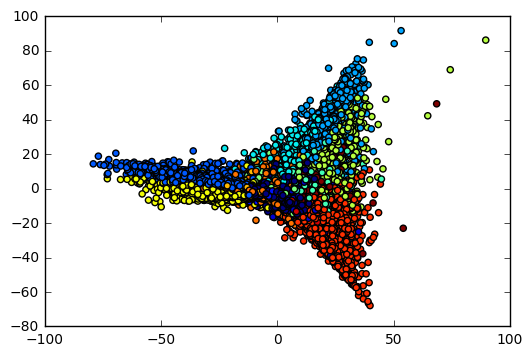

In [44]:
plt.show()